In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
plt.style.use('science')


In [2]:
with open("qualitative_results.json", "r") as f:
    projects = json.loads(f.read())

In [3]:
root_cause_count = defaultdict(int)

In [4]:
for project, dependencies in projects.items():
    for library, data in dependencies.items():
        root_cause_count[data["Root Cause"]] += 1

In [5]:
labels = list(root_cause_count.keys())
counts = list(root_cause_count.values())
total = sum(counts)

/var/folders/gq/s5tpqtkx0zn5szv_6cjc3pdw0000gn/T/ipykernel_59421/1018902942.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


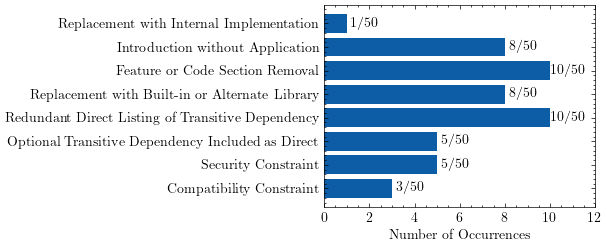

In [6]:
fig, ax = plt.subplots()
bars = ax.barh(labels, counts)

# Annotations
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width}/{total}', 
                xy=(width + 0.8, bar.get_y() + bar.get_height() / 2),
                ha='center', va='center',
                color='black')


ax.set_xlim(0, max(counts) + 2)  # Adjust x-axis limits
ax.set_xlabel('Number of Occurrences')


plt.tight_layout()
plt.gca().invert_yaxis()  # This inverts the y-axis to have the bar with the highest count at the top

plt.savefig("docs/images/rq3.pdf", bbox_inches='tight')
plt.show()